<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [6]:
dfdup = df[df.duplicated()]

dfdup.count()

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [7]:
df = df.drop_duplicates()

### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [76]:
import numpy as np

EdFreq = df['EdLevel'].describe(include = 'all')['top']

df['EdLevel'] = df['EdLevel'].replace(np.nan,'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')

df['EdLevel'].isnull().sum()

np.int64(0)

### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


/tmp/ipykernel_4600/92777902.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ConvertedCompYearly_minmax'] = (df_filtered['ConvertedCompYearly'] - min_value)/(max_value - min_value)
/tmp/ipykernel_4600/92777902.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ConvertedCompYearly_zscore'] = (df_filtered['ConvertedCompYearly'] - mean_value)/ std_value


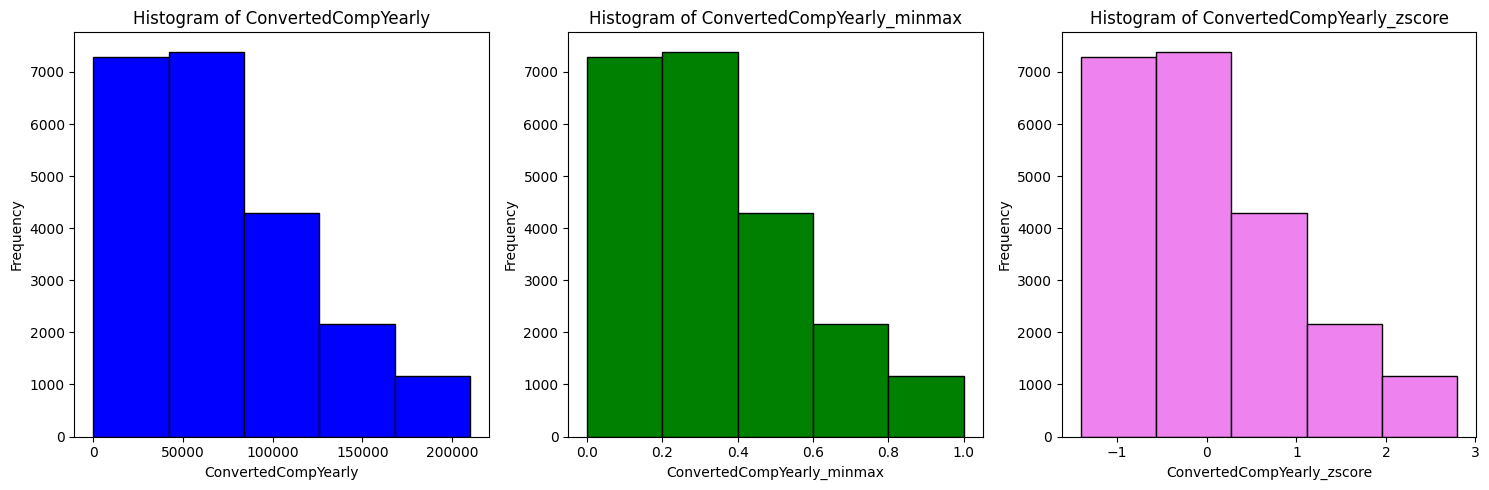

72         7322.0
374       30074.0
379       91295.0
385       53703.0
389      110000.0
           ...   
41179     15600.0
41180     44640.0
41184    170000.0
41185    116844.0
41186     12000.0
Name: ConvertedCompYearly, Length: 22294, dtype: float64
72       0.034862
374      0.143205
379      0.434735
385      0.255725
389      0.523807
           ...   
41179    0.074281
41180    0.212568
41184    0.809523
41185    0.556398
41186    0.057138
Name: ConvertedCompYearly_minmax, Length: 22294, dtype: float64
72      -1.261140
374     -0.805424
379      0.420816
385     -0.332141
389      0.795472
           ...   
41179   -1.095334
41180   -0.513671
41184    1.997255
41185    0.932555
41186   -1.167441
Name: ConvertedCompYearly_zscore, Length: 22294, dtype: float64


In [79]:
import matplotlib.pyplot as plt

df_cleaned = df.dropna(subset = ['ConvertedCompYearly'])

cap = df_cleaned['ConvertedCompYearly'].quantile(0.95)
df_filtered = df_cleaned[df_cleaned['ConvertedCompYearly'] <= cap]

min_value = df_filtered['ConvertedCompYearly'].min()
max_value = df_filtered['ConvertedCompYearly'].max()

df_filtered['ConvertedCompYearly_minmax'] = (df_filtered['ConvertedCompYearly'] - min_value)/(max_value - min_value)

mean_value = df_filtered['ConvertedCompYearly'].mean()
std_value = df_filtered['ConvertedCompYearly'].std()

df_filtered['ConvertedCompYearly_zscore'] = (df_filtered['ConvertedCompYearly'] - mean_value)/ std_value

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(df_filtered['ConvertedCompYearly'], bins = 5, color = 'blue', edgecolor = 'black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(df_filtered['ConvertedCompYearly_minmax'], bins = 5, color = 'green', edgecolor = 'black')
plt.title('Histogram of ConvertedCompYearly_minmax')
plt.xlabel('ConvertedCompYearly_minmax')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(df_filtered['ConvertedCompYearly_zscore'], bins = 5, color = 'violet', edgecolor = 'black')
plt.title('Histogram of ConvertedCompYearly_zscore')
plt.xlabel('ConvertedCompYearly_zscore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(df_filtered['ConvertedCompYearly'])
print(df_filtered['ConvertedCompYearly_minmax'])
print(df_filtered['ConvertedCompYearly_zscore'])

### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [ ]:
## Write your code here

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
